Dataset - https://www.kaggle.com/datasets/ramkrijal/tomato-daily-prices?resource=download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Tomato.csv')
df

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato
...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato
2737,2021-05-10,Kg,10,15,12.5,Tomato
2738,2021-05-11,Kg,10,15,12.5,Tomato
2739,2021-05-12,Kg,30,35,32.5,Tomato


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2741 non-null   object 
 1   Unit     2741 non-null   object 
 2   Minimum  2741 non-null   int64  
 3   Maximum  2741 non-null   int64  
 4   Average  2741 non-null   float64
 5   Market   2741 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 128.6+ KB


In [4]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
correlation_matrix = df.corr()

ValueError: could not convert string to float: 'Kg'

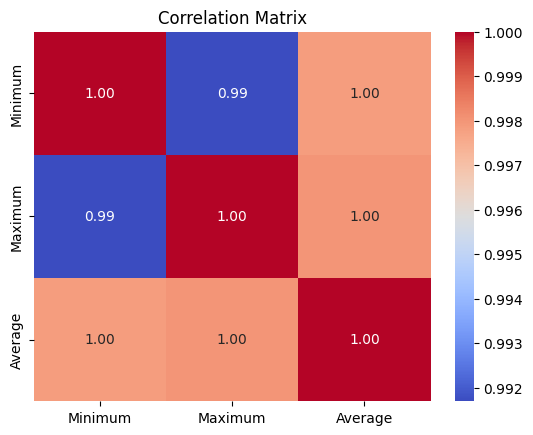

In [ ]:
# Visualize correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

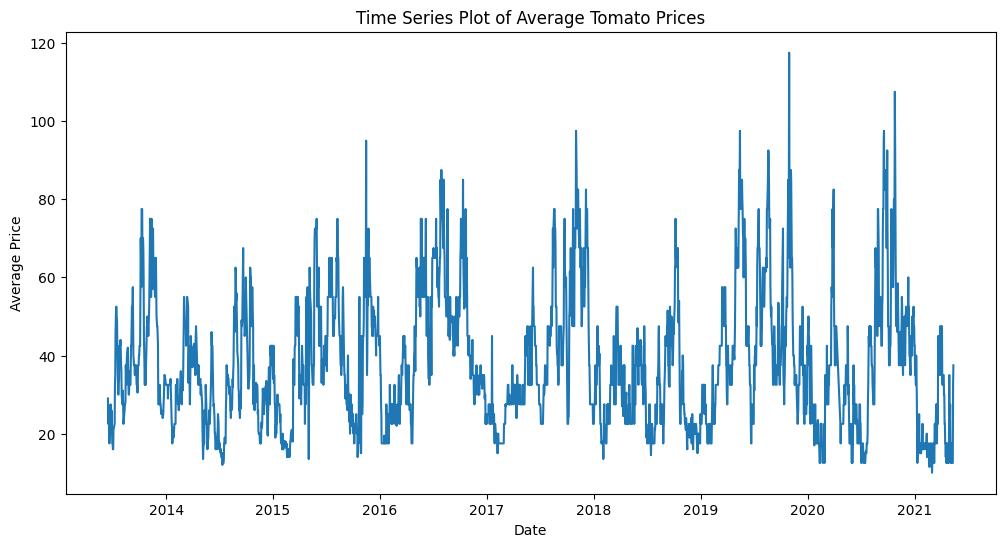

In [ ]:
# Time series plot for average prices
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Average', data=df)
plt.title('Time Series Plot of Average Tomato Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

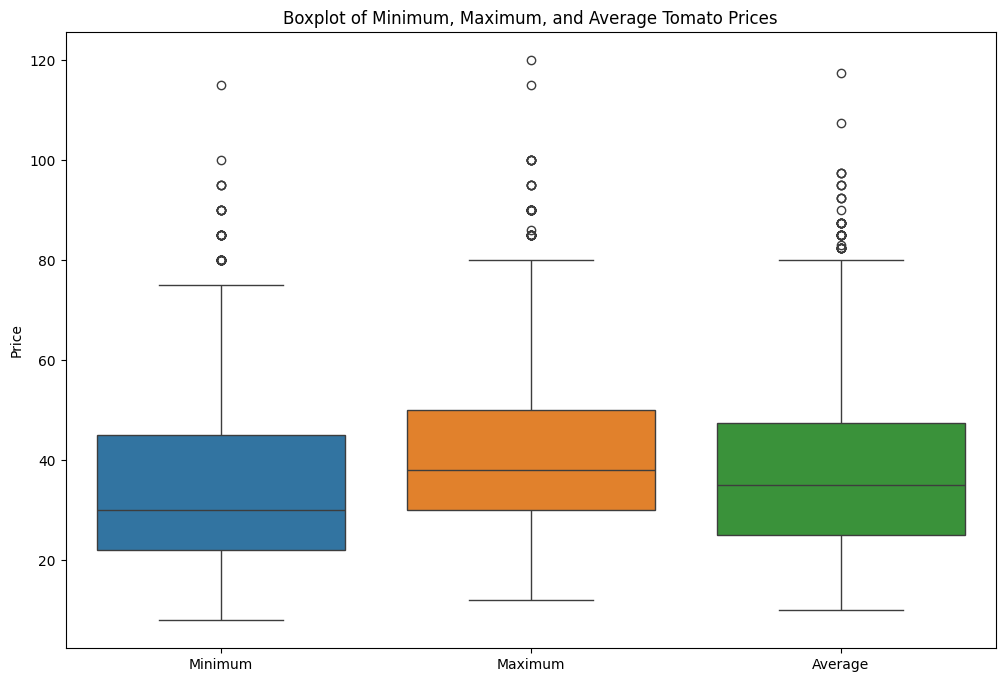

In [ ]:
# Boxplot for minimum, maximum, and average prices
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Minimum', 'Maximum', 'Average']])
plt.title('Boxplot of Minimum, Maximum, and Average Tomato Prices')
plt.ylabel('Price')
plt.show()


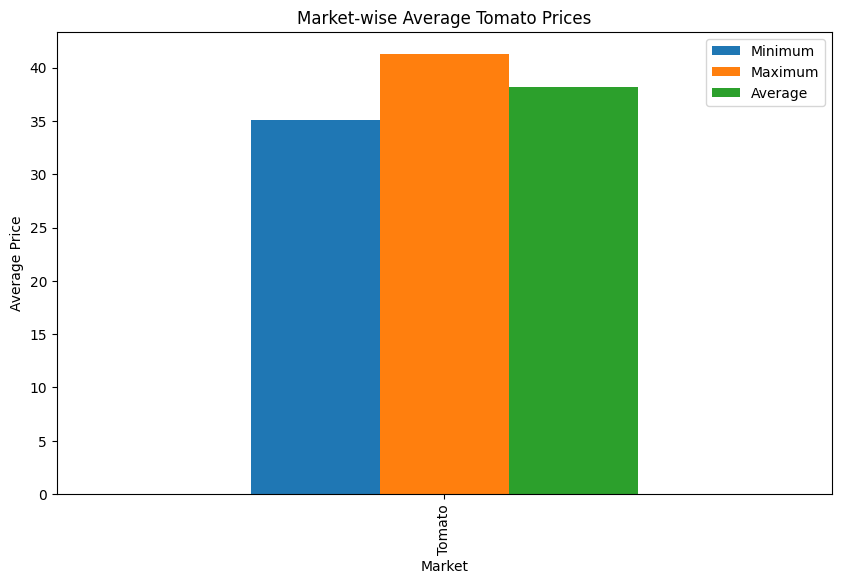

In [ ]:
# Market-wise analysis
market_summary = df.groupby('Market').agg({'Minimum': 'mean', 'Maximum': 'mean', 'Average': 'mean'})

# Bar plot for market-wise average prices
market_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Market-wise Average Tomato Prices')
plt.ylabel('Average Price')
plt.show()

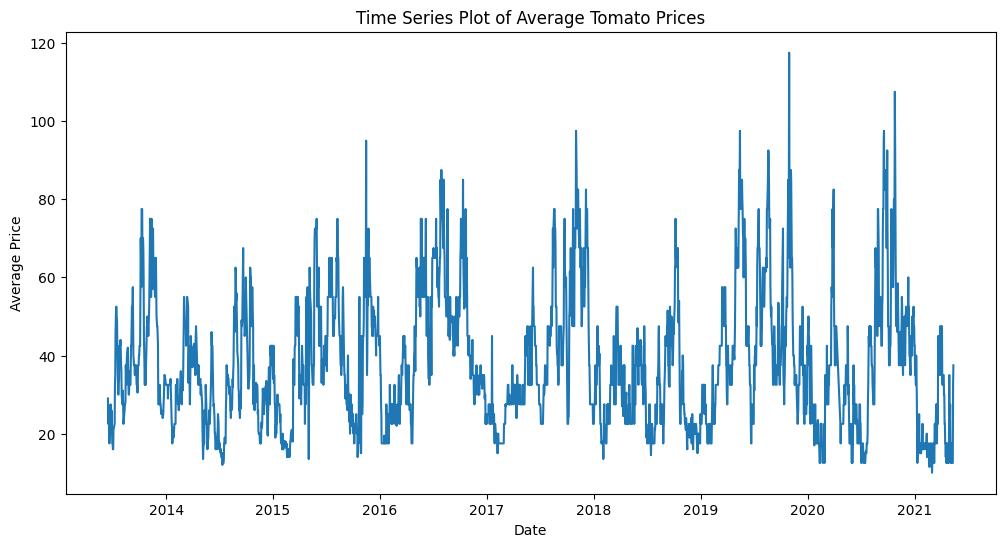

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


['arima_model.joblib']

In [ ]:

from statsmodels.tsa.arima.model import ARIMA



# Read the dataset

df = pd.read_csv('/content/Tomato.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Average'])
plt.title('Time Series Plot of Average Tomato Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

# Define a function to fit the ARIMA model
def fit_arima_model(data, order=(1, 1, 1)):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

# Fit the ARIMA model
arima_model = fit_arima_model(df['Average'], order=(1, 1, 1))

# Save the model using joblib
import joblib
joblib.dump(arima_model, 'arima_model.joblib')

In [ ]:
# Define a function to fit the ARIMA model
def fit_arima_model(data, order=(1, 1, 1)):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

# Fit the ARIMA model
arima_model = fit_arima_model(df['Average'], order=(1, 1, 1))

# Save the model using joblib
import joblib
joblib.dump(arima_model, 'model.joblib')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


['model.joblib']

In [ ]:
import pandas as pd

data = {
    'Disease': ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold',
                'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
                'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'],
    'Treatment': ['CUREAL Best Fungicide & Bactericide', 'NATIVO FUNGICIDE', 'ACROBAT FUNGICIDE',
                  'Virus Special (Set of Immuno 1 ltr + Enviro 1 ltr)', 'Roko Fungicide', 'OMITE INSECTICIDE',
                  'Propi Propineb 70% WP Fungicide for Plants Diesese Control Pesticide', 'Syngenta Amistor Top Fungicide',
                  'V Bind Viral Disease Special', 'Tomato Fertilizer Organic, for Home, Balcony, Terrace & Outdoor Gardening'],
    'Image URL': [
        'https://encrypted-tbn1.gstatic.com/shopping?q=tbn:ANd9GcRKHQh4EwbE0ksZ_RTOhsGtvTO68zllR9djrYvUrZ-DO6FYo2kYpmyFL8UgaK6aiHJuUWbkax_uhcxMpGfwSHa2CKWqaIZnFp1vIRbGkrZhtGv-Zq-72y61&usqp=CAE',
        'https://farmagritech.com/wp-content/uploads/2019/11/F-Nativo-3.jpg',
        'https://encrypted-tbn3.gstatic.com/shopping?q=tbn:ANd9GcRpQmIM9QZkFI43PPlHVFaSlGdrdMP8LFHXAo9b_OGOQCi3R6G-SsqnCXFR4CU9bVAcyuBGTrQRAkRrU9fm-1TGeXg9PrsB&usqp=CAE',
        'https://encrypted-tbn1.gstatic.com/shopping?q=tbn:ANd9GcQfgH6lswqhV2hUhqZwEfgQBU1eUP1GCvETxg_a3JFOERS2tc80k8gNMbHM_XxReblck1T7tR95X8Qojdj1k0yAyvhmCZHvkFWaT_L-a8ofElEXerVJqvsF&usqp=CAE',
        'https://farmagritech.com/wp-content/uploads/2020/05/roko-insecticide.jpg',
        'https://encrypted-tbn1.gstatic.com/shopping?q=tbn:ANd9GcQxe-M4vyRx94TlpTOw6tlzvagjvaTRCWRLoKd58JML7T3rSV8GJK67YjxIiR-PHL02DL2CHsHPLzExBf6uq7BqxcLPxgmh9w&usqp=CAE',
        'https://rukminim1.flixcart.com/image/416/416/k3xcdjk0/soil-manure/y/f/j/100-propineb-70-wp-fungicide-for-plants-diesese-control-propi-original-imafmxg3jghhdyt6.jpeg?q=70',
        'https://krushikendra.com/image/cache/catalog/Sygenta/syngenta-amistar-top-fungicides-500x500-800x800.jpg',
        'https://encrypted-tbn1.gstatic.com/shopping?q=tbn:ANd9GcRmHRAqOUGXt76NPfOMXrUVRvDt8gRYd3-HTexGYI0d4PNmDuLXbfTchIRipVD-hx1wob7hHyVTbmyS85fTcADpBUMezetO&usqp=CAE',
        'https://cdn.shopify.com/s/files/1/1489/8850/products/Tomato_feretilizer-new_869x868.jpg?v=1582699319'
    ],
    'Buy URL': [
        'https://agribegri.com/products/cureal---best-fungicide--bactericide-zinc-based-250-ml.php',
        'https://farmagritech.com/product/nativo-fungicide/?attribute_pa_size=50gm&utm_source=Google%20Shopping&utm_campaign=Google%20shopping%20feed%201&utm_medium=cpc&utm_term=1326',
        'https://www.bighaat.com/products/acrobat-fungicide?variant=31177935519767&currency=INR&utm_medium=product_sync&utm_source=google&utm_content=sag_organic&utm_campaign=sag_organic',
        'https://agribegri.com/products/virus-special-enviroimmuno-1-litre.php',
        'https://farmagritech.com/product/roko-fungicide/?attribute_pa_size=500gm&utm_source=Google%20Shopping&utm_campaign=Google%20shopping%20feed%201&utm_medium=cpc&utm_term=3239',
        'https://www.bighaat.com/products/omite-insecticide?variant=31276117196823&currency=INR&utm_medium=product_sync&utm_source=google&utm_content=sag_organic&utm_campaign=sag_organic',
        'https://www.flipkart.com/propi-propineb-70-wp-fungicide-plants-diesese-control-pesticide/p/itm9db96656402f8?pid=SMNFMX8FJJHZAYFJ&lid=LSTSMNFMX8FJJHZAYFJDGFGXW&marketplace=FLIPKART&cmpid=content_soil-manure_730597647_g_8965229628_gmc_pla&tgi=sem,1,G,11214002,g,search,,476044024748,,,,c,,,,,,,&ef_id=Cj0KCQjwsLWDBhCmARIsAPSL3_2bIC4skU03mHTgG2GvlhsFQstQaLrFyAaL10NTTCDsuI9BoffpPFUaAjn1EALw_wcB:G:s&s_kwcid=AL!739!3!476044024748!!!g!293946777986!&gclsrc=aw.ds',
        'https://krushikendra.com/Buy-Syngenta-Amistor-Top-Fungicide-100-ml-Online',
        'https://agribegri.com/products/viricide-online-.php',
        'https://www.casagardenshop.com/products/tomato-fertilizer-for-home-terrace-outdoor-gardening?variant=32106353131619&currency=INR&utm_medium=product_sync&utm_source=google&utm_content=sag_organic&utm_campaign=sag_organic&utm_campaign=gs-2020-02-08&utm_source=google&utm_medium=smart_campaign'
    ]
}

df = pd.DataFrame(data)
df


,Disease,Treatment,Image URL,Buy URL
0,Tomato___Bacterial_spot,CUREAL Best Fungicide & Bactericide,https://encrypted-tbn1.gstatic.com/shopping?q=...,https://agribegri.com/products/cureal---best-f...
1,Tomato___Early_blight,NATIVO FUNGICIDE,https://farmagritech.com/wp-content/uploads/20...,https://farmagritech.com/product/nativo-fungic...
2,Tomato___Late_blight,ACROBAT FUNGICIDE,https://encrypted-tbn3.gstatic.com/shopping?q=...,https://www.bighaat.com/products/acrobat-fungi...
3,Tomato___Leaf_Mold,Virus Special (Set of Immuno 1 ltr + Enviro 1 ...,https://encrypted-tbn1.gstatic.com/shopping?q=...,https://agribegri.com/products/virus-special-e...
4,Tomato___Septoria_leaf_spot,Roko Fungicide,https://farmagritech.com/wp-content/uploads/20...,https://farmagritech.com/product/roko-fungicid...
5,Tomato___Spider_mites Two-spotted_spider_mite,OMITE INSECTICIDE,https://encrypted-tbn1.gstatic.com/shopping?q=...,https://www.bighaat.com/products/omite-insecti...
6,Tomato___Target_Spot,Propi Propineb 70% WP Fungicide for Plants Die...,https://rukminim1.flixcart.com/image/416/416/k...,https://www.flipkart.com/propi-propineb-70-wp-...
7,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Syngenta Amistor Top Fungicide,https://krushikendra.com/image/cache/catalog/S...,https://krushikendra.com/Buy-Syngenta-Amistor-...
8,Tomato___Tomato_mosaic_virus,V Bind Viral Disease Special,https://encrypted-tbn1.gstatic.com/shopping?q=...,https://agribegri.com/products/viricide-online...
9,Tomato___healthy,"Tomato Fertilizer Organic, for Home, Balcony, ...",https://cdn.shopify.com/s/files/1/1489/8850/pr...,https://www.casagardenshop.com/products/tomato...


In [ ]:
df

,Tomato,Treatment,Image URL,Buy URL
0,Tomato___Bacterial_spot,CUREAL Best Fungicide & Bactericide,https://encrypted-tbn1.gstatic.com/shopping?q=...,https://agribegri.com/products/cureal---best-f...
1,Tomato___Early_blight,NATIVO FUNGICIDE,https://farmagritech.com/wp-content/uploads/20...,https://farmagritech.com/product/nativo-fungic...
2,Tomato___Late_blight,ACROBAT FUNGICIDE,https://encrypted-tbn3.gstatic.com/shopping?q=...,https://www.bighaat.com/products/acrobat-fungi...
3,Tomato___Leaf_Mold,Virus Special (Set of Immuno 1 ltr + Enviro 1 ...,https://encrypted-tbn1.gstatic.com/shopping?q=...,https://agribegri.com/products/virus-special-e...
4,Tomato___Septoria_leaf_spot,Roko Fungicide,https://farmagritech.com/wp-content/uploads/20...,https://farmagritech.com/product/roko-fungicid...
5,Tomato___Spider_mites Two-spotted_spider_mite,OMITE INSECTICIDE,https://encrypted-tbn1.gstatic.com/shopping?q=...,https://www.bighaat.com/products/omite-insecti...
6,Tomato___Target_Spot,Propi Propineb 70% WP Fungicide for Plants Die...,https://rukminim1.flixcart.com/image/416/416/k...,https://www.flipkart.com/propi-propineb-70-wp-...
7,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Syngenta Amistor Top Fungicide,https://krushikendra.com/image/cache/catalog/S...,https://krushikendra.com/Buy-Syngenta-Amistor-...
8,Tomato___Tomato_mosaic_virus,V Bind Viral Disease Special,https://encrypted-tbn1.gstatic.com/shopping?q=...,https://agribegri.com/products/viricide-online...
9,Tomato___healthy,"Tomato Fertilizer Organic, for Home, Balcony, ...",https://cdn.shopify.com/s/files/1/1489/8850/pr...,https://www.casagardenshop.com/products/tomato...


In [ ]:
df=df.rename(columns={'Disease':'Tomato'})

In [ ]:
df.to_csv('tomato_suplliments.csv', index=False)

In [ ]:
df.columns

Index(['Tomato', 'Treatment', 'Image URL', 'Buy URL'], dtype='object')

In [ ]:
import pandas as pd
import numpy as np

# Sample data generation
np.random.seed(42)  # for reproducibility

cities = ['City' + str(i) for i in range(1, 51)]
local_areas = ['LocalArea' + str(i) for i in range(1, 51)]

data = {
    'City': np.random.choice(cities, 50),
    'Local_Area': np.random.choice(local_areas, 50),
    'Weather_Conditions': np.random.choice(['Sunny', 'Rainy', 'Moderate'], 50),
    'Soil_Characteristics': np.random.choice(['Loam', 'Clay', 'Sandy'], 50),
    'Fertilizer': ['Fertilizer' + str(i) for i in range(1, 51)],
    'Nutrient_Content': np.random.choice(['High Nitrogen', 'Balanced', 'High Phosphorus', 'High Potassium'], 50),
    'Recommended_Usage': np.random.choice(['Spring', 'Summer', 'Fall'], 50),
    'Local_Temperature': np.random.uniform(20, 40, 50),
    'Local_Humidity': np.random.uniform(30, 80, 50),
    'Crop_Type': np.random.choice(['Rice', 'Wheat', 'Cotton', 'Maize', 'Barley'], 50),
}

df = pd.DataFrame(data)

df


,City,Local_Area,Weather_Conditions,Soil_Characteristics,Fertilizer,Nutrient_Content,Recommended_Usage,Local_Temperature,Local_Humidity,Crop_Type
0,City39,LocalArea2,Sunny,Loam,Fertilizer1,Balanced,Spring,35.597511,72.650473,Maize
1,City29,LocalArea20,Sunny,Loam,Fertilizer2,High Potassium,Summer,32.840633,44.722445,Barley
2,City15,LocalArea28,Moderate,Clay,Fertilizer3,High Potassium,Summer,21.682799,49.254886,Maize
3,City43,LocalArea47,Moderate,Loam,Fertilizer4,High Potassium,Summer,23.232574,72.556834,Cotton
4,City8,LocalArea7,Moderate,Sandy,Fertilizer5,High Nitrogen,Fall,37.971084,45.846100,Maize
5,City21,LocalArea44,Sunny,Sandy,Fertilizer6,High Potassium,Fall,32.128581,38.474637,Barley
6,City39,LocalArea8,Moderate,Loam,Fertilizer7,High Nitrogen,Spring,20.183941,57.840063,Wheat
7,City19,LocalArea47,Moderate,Sandy,Fertilizer8,Balanced,Spring,22.029431,76.807739,Maize
8,City23,LocalArea35,Sunny,Sandy,Fertilizer9,High Nitrogen,Fall,33.270035,64.801490,Wheat
9,City11,LocalArea14,Moderate,Loam,Fertilizer10,Balanced,Summer,20.101232,58.503059,Cotton


In [ ]:
df

,City,Local_Area,Weather_Conditions,Soil_Characteristics,Fertilizer,Nutrient_Content,Recommended_Usage,Local_Temperature,Local_Humidity,Crop_Type
0,City39,LocalArea2,Sunny,Loam,Fertilizer1,Balanced,Spring,35.597511,72.650473,Maize
1,City29,LocalArea20,Sunny,Loam,Fertilizer2,High Potassium,Summer,32.840633,44.722445,Barley
2,City15,LocalArea28,Moderate,Clay,Fertilizer3,High Potassium,Summer,21.682799,49.254886,Maize
3,City43,LocalArea47,Moderate,Loam,Fertilizer4,High Potassium,Summer,23.232574,72.556834,Cotton
4,City8,LocalArea7,Moderate,Sandy,Fertilizer5,High Nitrogen,Fall,37.971084,45.846100,Maize
5,City21,LocalArea44,Sunny,Sandy,Fertilizer6,High Potassium,Fall,32.128581,38.474637,Barley
6,City39,LocalArea8,Moderate,Loam,Fertilizer7,High Nitrogen,Spring,20.183941,57.840063,Wheat
7,City19,LocalArea47,Moderate,Sandy,Fertilizer8,Balanced,Spring,22.029431,76.807739,Maize
8,City23,LocalArea35,Sunny,Sandy,Fertilizer9,High Nitrogen,Fall,33.270035,64.801490,Wheat
9,City11,LocalArea14,Moderate,Loam,Fertilizer10,Balanced,Summer,20.101232,58.503059,Cotton


Fertilizer_prediction

Dataset - https://www.kaggle.com/datasets/gdabhishek/fertilizer-prediction

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Fertilizer Prediction.csv')


In [ ]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
# Rename columns and remove extra spaces
df.columns = df.columns.str.lower().str.strip()

In [ ]:
df.columns

Index(['temparature', 'humidity', 'moisture', 'soil type', 'crop type',
       'nitrogen', 'potassium', 'phosphorous', 'fertilizer name'],
      dtype='object')

In [ ]:
df

,temparature,humidity,moisture,soil type,crop type,nitrogen,potassium,phosphorous,fertilizer name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,28-28
95,30,60,27,3,9,4,17,17,10-26-26
96,38,72,51,2,10,39,0,0,Urea
97,36,60,43,4,4,15,0,41,DAP


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le_soil = LabelEncoder()
le_crop = LabelEncoder()

df['soil type'] = le_soil.fit_transform(df['soil type'])
df['crop type'] = le_crop.fit_transform(df['crop type'])

# Split the dataset into features (X) and target variable (y)
X = df.drop('fertilizer name', axis=1)
y = df['fertilizer name']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
49,33,64,51,4,3,5,9,29
70,26,52,39,1,7,21,0,23
68,25,50,40,1,7,6,19,16
15,31,62,49,0,8,10,13,14
39,29,58,34,4,4,15,0,37
...,...,...,...,...,...,...,...,...
60,28,54,41,1,6,36,0,0
71,31,62,32,3,9,39,0,0
14,26,52,31,3,2,14,0,41
92,36,68,41,3,2,41,0,0


In [ ]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     int64 
 4   Crop Type        99 non-null     int64 
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(8), object(1)
memory usage: 7.1+ KB


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a new model
new_model = RandomForestClassifier(random_state=42)
new_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from joblib import dump

# Save the new model
dump(new_model, 'model.joblib')


['model.joblib']

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2
